In [3]:
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
import get_all_tickers.get_tickers as gt
import yfinance as yf

In [6]:
price_data = pd.read_csv("relevant_price_data_2019-2020.csv", index_col=0)
fundamental_data = pd.read_csv("relevant_fundamentals.csv", index_col=0)

## Add new columns : BE/ME and OP

In [7]:
missing_values = fundamental_data[(fundamental_data.mar_cap == 0)] # missing values
missing_values["beme"] = np.nan # replaced with NaN
d = fundamental_data.drop(missing_values.index) # dropped so that I can calculate the BEME
d["beme"] = d["at"]/d["mar_cap"]
fundamental_data = d.append(missing_values)
fundamental_data.reset_index(drop=True, inplace = True)
fundamental_data

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,at,ebit,mar_cap,beme
0,DDD,7.072820e+08,-7.446000e+06,8.801668e+08,0.803577
1,MMM,4.539000e+10,1.928000e+09,9.886729e+10,0.459100
2,WBAI,5.690690e+08,-5.233700e+07,1.281445e+08,4.440839
3,EGHT,6.872440e+08,-3.309800e+07,2.008404e+09,0.342184
4,AHC,1.292670e+08,-1.194000e+06,2.841195e+07,4.549741
...,...,...,...,...,...
5274,SOHON,4.662090e+08,-7.272725e+06,0.000000e+00,NaN
5275,SOHOO,4.662090e+08,-7.272725e+06,0.000000e+00,NaN
5276,SPKEP,3.611280e+08,2.915400e+07,0.000000e+00,NaN
5277,WHLRD,4.743380e+08,4.849000e+06,0.000000e+00,NaN


In [4]:
missing_values = fundamental_data[(fundamental_data.ebit == 0)] # missing values
missing_values["op"] = np.nan # replaced with NaN
d = fundamental_data.drop(missing_values.index) # dropped so that I can calculate the BEME
d["op"] = d["ebit"]/d["at"]
fundamental_data = d.append(missing_values)
fundamental_data.reset_index(drop=True, inplace = True)
fundamental_data

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,at,ebit,mar_cap,beme,op
0,DDD,7.072820e+08,-7.446000e+06,8.801668e+08,0.803577,-0.010528
1,MMM,4.539000e+10,1.928000e+09,9.886729e+10,0.459100,0.042476
2,WBAI,5.690690e+08,-5.233700e+07,1.281445e+08,4.440839,-0.091970
3,EGHT,6.872440e+08,-3.309800e+07,2.008404e+09,0.342184,-0.048160
4,AHC,1.292670e+08,-1.194000e+06,2.841195e+07,4.549741,-0.009237
...,...,...,...,...,...,...
5274,EVBN,2.056993e+09,0.000000e+00,1.393415e+08,14.762238,NaN
5275,IMH,2.469308e+09,0.000000e+00,3.163255e+07,78.062246,NaN
5276,PRK,9.240006e+09,0.000000e+00,1.673021e+09,5.522946,NaN
5277,SACH,1.696320e+08,0.000000e+00,9.093293e+07,1.865463,NaN


### Momentum

In [25]:
example_date = "2019-02-04"
today = "2019-11-12"

In [6]:
date_data = price_data[price_data.date == example_date]
today_data = price_data[price_data.date == today]

In [7]:
momentum_list = []
mom_ticker_list = []
for ticker in date_data.ticker:
    try:
        date_price = date_data[date_data.ticker == ticker][:1]["adjclose"].item()
        today_price = today_data[today_data.ticker == ticker][:1]["adjclose"].item()
        momentum = today_price - date_price
        momentum_list.append(momentum)
        mom_ticker_list.append(ticker)
    except:
        pass

In [8]:
df = pd.DataFrame({
    "ticker" : mom_ticker_list,
    "momentum" : momentum_list
})

df = df.sort_values(by = "momentum", ascending = False)
df.reset_index(drop = True, inplace = True)
momentum_stocks = df[:20]["ticker"].to_list()

In [9]:
value_stocks_df = fundamental_data.sort_values(by = "beme", ascending = False)
profit_stocks_df = fundamental_data.sort_values(by = "op", ascending = False)

In [10]:
value_stocks = value_stocks_df[:20]["ticker"].to_list()

In [11]:
profit_stocks = profit_stocks_df[:20]["ticker"].to_list()

In [12]:
print(momentum_stocks, value_stocks, profit_stocks)

['NVR', 'CABO', 'AZO', 'SEB', 'CMG', 'WTM', 'SHW', 'GOOG', 'CSGP', 'GOOGL', 'TDG', 'MKTX', 'AMZN', 'Y', 'EQIX', 'CHTR', 'SHOP', 'MELI', 'SAM', 'IMBI'] ['AVAL', 'WF', 'SHG', 'CIB', 'KB', 'ITCB', 'TLK', 'TSCAP', 'KT', 'BSAC', 'MFG', 'EC', 'MUFG', 'SMFG', 'SHIPW', 'PKX', 'BCH', 'CRESY', 'NMR', 'IRS'] ['SBR', 'NRT', 'PBT', 'MSB', 'BPMC', 'SINO', 'WINA', 'VYGR', 'FLGT', 'UI', 'QDEL', 'SIGA', 'CODX', 'SGEN', 'MED', 'GBL', 'APT', 'BWMX', 'RVP', 'DVD']


In [186]:
import pandas as pd
import random
import yahoo_fin.stock_info as si
import yfinance as yf
import json
import csv
import re
from io import StringIO
from bs4 import BeautifulSoup
import requests
import get_all_tickers.get_tickers as gt
from lxml import html
import matplotlib.pyplot as plt

## Scrape Sector and Country to diversify

Create Dataframes

1. Value Stocks

In [14]:
name_list = []

for ticker in value_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in value_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        page = requests.get(url.format(ticker, ticker))
        tree = html.fromstring(page.content)
        country = tree.xpath('//div[@data-reactid=7]/p/text()[3]')[0].strip()

        country_list.append(country)
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in value_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

value_df = pd.DataFrame({
    "ticker" : value_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

2. Momentum Stocks

In [15]:
name_list = []

for ticker in momentum_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in momentum_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        page = requests.get(url.format(ticker, ticker))
        tree = html.fromstring(page.content)
        country = tree.xpath('//div[@data-reactid=7]/p/text()[3]')[0].strip()

        country_list.append(country)
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in momentum_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

momentum_df = pd.DataFrame({
    "ticker" : momentum_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

3. Profit Stocks

In [16]:
name_list = []

for ticker in profit_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in profit_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        page = requests.get(url.format(ticker, ticker))
        tree = html.fromstring(page.content)
        country = tree.xpath('//div[@data-reactid=7]/p/text()[3]')[0].strip()

        country_list.append(country)
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in profit_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

profit_df = pd.DataFrame({
    "ticker" : profit_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

In [17]:
value_df.to_csv("value_stocks_2020-4_2020-11.csv")
profit_df.to_csv("profit_stocks_2020-4_2020-11.csv")
momentum_df.to_csv("momentum_stocks_2020-4_2020-11.csv")

# Now lets form a diversified Portfolio

### It should consist of 20 stocks, diversified over industry and country

In [18]:
portfolio_df = pd.DataFrame(columns=["ticker", "names", "industry", "country"])
index = 0

while (len(portfolio_df) < 20) & (index < 20):
    
    try:
    
        if momentum_df.loc[index]["industry"] not in portfolio_df.industry.to_list() and momentum_df.loc[index]["country"] not in portfolio_df.country.to_list():
            portfolio_df = portfolio_df.append(momentum_df.loc[index])

        elif value_df.loc[index]["industry"] not in portfolio_df.industry.to_list() and value_df.loc[index]["country"] not in portfolio_df.country.to_list():
            portfolio_df = portfolio_df.append(value_df.loc[index])

        elif profit_df.loc[index]["industry"] not in portfolio_df.industry.to_list() and profit_df.loc[index]["country"] not in portfolio_df.country.to_list():
            portfolio_df = portfolio_df.append(profit_df.loc[index])

        else:
            index += 1
    except:
        index += 1
    
    
    

In [19]:
portfolio_df.reset_index(drop=True, inplace = True)
portfolio_df

,ticker,names,industry,country
0,NVR,"NVR, Inc.",Consumer Cyclical,"Reston, VA 20190"
1,AVAL,Grupo Aval Acciones y Valores S,Financial Services,Colombia
2,SBR,Sabine Royalty Trust,Energy,"Dallas, TX 75219"
3,CABO,"Cable One, Inc.",Communication Services,United States
4,SEB,Seaboard Corporation,Industrials,"Merriam, KS 66202"
5,MSB,Mesabi Trust,Basic Materials,"New York, NY 10005"
6,FLGT,"Fulgent Genetics, Inc.",Healthcare,"Temple City, CA 91780"
7,UI,Ubiquiti Inc.,Technology,"New York, NY 10017"
8,SHIPW,Seanergy Maritime Holdings Corp,,Athens 166 74
9,CRESY,Cresud S.A.C.I.F. y A.,Consumer Defensive,Buenos Aires C1091AAQ


## Get live prices

In [20]:
live_prices = []

for tick in portfolio_df.ticker:
    t = si.get_live_price(tick)
    print(t)
    live_prices.append(t)
    
portfolio_df["live_price"] = live_prices

4198.3525390625
5.099999904632568
28.809999465942383
2005.5899658203125
3290.0
22.520000457763672
43.279998779296875
242.52000427246094
0.019999999552965164
3.896199941635132


If we invested amount x, what are the fractions of the shares we would have to buy if we wanted to equally weight the stocks?

In [21]:
investment = float(input("How much do we want to invest?"))

fraction_list = []

for price in live_prices:
    fraction = investment/(len(live_prices)-3)/price
    fraction_list.append(fraction)
    
portfolio_df["fraction"] = fraction_list

How much do we want to invest? 100


In [22]:
portfolio_df

,ticker,names,industry,country,live_price,fraction
0,NVR,"NVR, Inc.",Consumer Cyclical,"Reston, VA 20190",4198.352539,0.003403
1,AVAL,Grupo Aval Acciones y Valores S,Financial Services,Colombia,5.100000,2.801121
2,SBR,Sabine Royalty Trust,Energy,"Dallas, TX 75219",28.809999,0.495860
3,CABO,"Cable One, Inc.",Communication Services,United States,2005.589966,0.007123
4,SEB,Seaboard Corporation,Industrials,"Merriam, KS 66202",3290.000000,0.004342
5,MSB,Mesabi Trust,Basic Materials,"New York, NY 10005",22.520000,0.634357
6,FLGT,"Fulgent Genetics, Inc.",Healthcare,"Temple City, CA 91780",43.279999,0.330077
7,UI,Ubiquiti Inc.,Technology,"New York, NY 10017",242.520004,0.058905
8,SHIPW,Seanergy Maritime Holdings Corp,,Athens 166 74,0.020000,714.285730
9,CRESY,Cresud S.A.C.I.F. y A.,Consumer Defensive,Buenos Aires C1091AAQ,3.896200,3.666576


## Get historical return of the portfolio

get spy data as benchmark and portfolio content data


In [83]:
today = "2020-11-13"
start = "2019-11-12"

In [127]:
port_data = pd.DataFrame()

for ticker in portfolio_df.ticker:
    try:
        stock_df = si.get_data(ticker, start_date = start, end_date = today)[[ "adjclose", "ticker"]]
        port_data = port_data.append(stock_df)
    except:
        pass

spy = si.get_data("spy", start_date = start, end_date = today)[["adjclose", "ticker"]]

calculate returns 

In [93]:
unique_tickers = port_data.ticker.unique()
data_df_list = []
for ticker in unique_tickers:
    return_list = [np.nan]
    ticker_df = port_data[port_data.ticker == ticker]
    n = 1
    ticker_df.reset_index(drop = True, inplace = True)
    while n <= len(ticker_df) - 1:
        day_ret = ((ticker_df.loc[n]["adjclose"] - ticker_df.loc[n-1]["adjclose"])/ticker_df.loc[n-1]["adjclose"]) * 100
        return_list.append(day_ret)
        n += 1
    ticker_df["returns"] = return_list
    data_df_list.append(ticker_df)
    

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [128]:
rets = []
for adj1, adj2 in zip(spy["adjclose"], spy.shift()["adjclose"]):
    ret = ((adj1 - adj2)/adj2) * 100
    rets.append(ret)

spy["day_ret"] = rets

In [140]:
kum_ret = []
n = 1
while n <= len(spy):
    ret = spy.day_ret[:n].sum()
    kum_ret.append(ret)
    n += 1
spy["kum_ret"] = kum_ret

In [145]:
for df in data_df_list:
    kum_ret = []
    n = 1
    while n <= len(df):
        ret = df.returns[:n].sum()
        kum_ret.append(ret)
        n += 1
    df["kum_ret"] = kum_ret

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [182]:
n = 0
kum_port_rets = []
while n < 254:
    rets = [data_df_list[m].loc[n]["kum_ret"] for m in range(len(data_df_list))]
    kum_port_ret = sum(rets)/len(data_df_list)
    kum_port_rets.append(kum_port_ret)
    n += 1

#### Add the returns to spy dataframe so we can compare them

In [183]:
spy["port_kum_rets"] = kum_port_rets

#### Plot the kum rets and compare them

Text(0.5, 1.0, 'SPY vs my Portfolio')

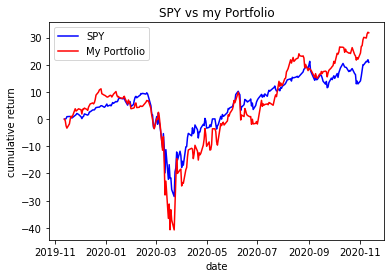

In [190]:
plt.plot(spy.index, spy.kum_ret, "blue", label = "SPY")
plt.plot(spy.index, spy.port_kum_rets, "red", label = "My Portfolio")
plt.legend()
plt.xlabel("date")
plt.ylabel("cumulative return")
plt.title("SPY vs my Portfolio")